## Importing Libraries

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import iplot
import plotly as py
import statsmodels.api as sm
from sklearn import metrics

## Reading Dataset

In [178]:
hazardData = pd.read_csv('/Users/pratik_4511/Desktop/Northeastern University /Quarter_5A/Capstone/final_final.csv')
hazardData.head(5)

,Hazard_type,Hazard_identification,hazard_identification_score,Completion_Time_Bucket,potential_risk,potential_risk_score,further_action_required,immediate_action_required_and_performed,immediate_action_taken,recommended_action,...,per_first_name,per_last_name,per_gender,ReportSent,Supervisor,Supervisor_Name,action_status,sha_enable,immediate_action_taken.1,recommended_action.1
0,Risk Assessment,Communication,2.0,Immediate,2199.0,1.0,0.0,0.0,NaN,Update JSHA to identify the hazard of slippery...,...,Adam,Brouse,6454.0,2.0,164,Adam Brouse,COMPLETE,1,NaN,Update JSHA to identify the hazard of slippery...
1,Near Miss,Water,4.0,Immediate,2201.0,5.0,0.0,1.0,Turn off water valve,Discuss with the crews the importance of turni...,...,Sean,Thibert,6454.0,2.0,1340,Sean Thibert,COMPLETE,1,Turn off water valve,Discuss with the crews the importance of turni...
2,Stop & Correct,Working at Heights,3.0,Within 2 Months,2199.0,1.0,0.0,0.0,NaN,To not have to tie off when loading round out ...,...,Curtis,Giroux,6454.0,2.0,489,Curtis Giroux,COMPLETE,1,NaN,To not have to tie off when loading round out ...
3,Unsafe Act,Energy Sources,4.0,Within 1 Week,2201.0,5.0,1.0,1.0,Stopped work and had employee lock out.,Matt to email Bristol to inform them of incide...,...,Bradley,Hofford,6454.0,2.0,489,Bradley Hofford,COMPLETE,1,Stopped work and had employee lock out.,Matt to email Bristol to inform them of incide...
4,Unsafe Condition,Housekeeping,3.0,More than 1 Year,2199.0,1.0,0.0,1.0,Informed Pierre B and Curtis G of the hazard a...,NaN,...,Bradley,Hofford,6454.0,2.0,489,Bradley Hofford,Complete,1,Informed Pierre B and Curtis G of the hazard a...,NaN


In [179]:
hazardData['Completion_Time_Bucket'].unique()

array(['Immediate', 'Within 2 Months', 'Within 1 Week',
       'More than 1 Year', 'Within 2 Weeks', 'Within 1 Month',
       'More than 2 Months'], dtype=object)

In [180]:
hazardData['Completion_Time_Bucket'] = hazardData['Completion_Time_Bucket'].replace({'Within 1 Week': 'Immediate', 'Within 2 Weeks': 'Immediate' })

## Cleaning Phase

In [181]:
# -----> 1. data info <------ #
hazardData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14480 entries, 0 to 14479
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Hazard_type                              14480 non-null  object 
 1   Hazard_identification                    14449 non-null  object 
 2   hazard_identification_score              14479 non-null  float64
 3   Completion_Time_Bucket                   14480 non-null  object 
 4   potential_risk                           14429 non-null  float64
 5   potential_risk_score                     14475 non-null  float64
 6   further_action_required                  14467 non-null  float64
 7   immediate_action_required_and_performed  14471 non-null  float64
 8   immediate_action_taken                   8698 non-null   object 
 9   recommended_action                       7473 non-null   object 
 10  immediate_action_score                   12534

In [182]:
### ------>  Dropping the Duplicate and unnecessary columns <----- ###

# Drop columns from the DataFrame
columns_to_drop = ['immediate_action_taken.1','recommended_action.1','Duration','Supervisor']

hazardData.drop(columns=columns_to_drop, inplace=True)

# Checking for duplicate values
hazardData.duplicated().sum()


79

In [183]:
hazardData = hazardData.drop_duplicates()
hazardData.head(5)

,Hazard_type,Hazard_identification,hazard_identification_score,Completion_Time_Bucket,potential_risk,potential_risk_score,further_action_required,immediate_action_required_and_performed,immediate_action_taken,recommended_action,...,Site,SiteLevel,Workplace,per_first_name,per_last_name,per_gender,ReportSent,Supervisor_Name,action_status,sha_enable
0,Risk Assessment,Communication,2.0,Immediate,2199.0,1.0,0.0,0.0,NaN,Update JSHA to identify the hazard of slippery...,...,3311,4708,Main access drift,Adam,Brouse,6454.0,2.0,Adam Brouse,COMPLETE,1
1,Near Miss,Water,4.0,Immediate,2201.0,5.0,0.0,1.0,Turn off water valve,Discuss with the crews the importance of turni...,...,3317,4331,1860 up ramp,Sean,Thibert,6454.0,2.0,Sean Thibert,COMPLETE,1
2,Stop & Correct,Working at Heights,3.0,Within 2 Months,2199.0,1.0,0.0,0.0,NaN,To not have to tie off when loading round out ...,...,3317,4320,Nickel Rim South,Curtis,Giroux,6454.0,2.0,Curtis Giroux,COMPLETE,1
3,Unsafe Act,Energy Sources,4.0,Immediate,2201.0,5.0,1.0,1.0,Stopped work and had employee lock out.,Matt to email Bristol to inform them of incide...,...,3317,4324,"Shop, 1780L, 1820L, and Ramp",Bradley,Hofford,6454.0,2.0,Bradley Hofford,COMPLETE,1
4,Unsafe Condition,Housekeeping,3.0,More than 1 Year,2199.0,1.0,0.0,1.0,Informed Pierre B and Curtis G of the hazard a...,NaN,...,3317,4324,"Shop, 1780L, 1820L, and Ramp",Bradley,Hofford,6454.0,2.0,Bradley Hofford,Complete,1


In [185]:
### ------> instead of dropping the null values we are replacing with 'Not Specified' <------- ###   

import pandas as pd

# Replace NaN values in 'immediate_action_taken' column with 'Not Specified'
hazardData['immediate_action_taken'].fillna('Not Specified', inplace=True)

# Verify the changes
print(hazardData['immediate_action_taken'].value_counts())

# ---------------------------------------------------------------------------------- #

# Replace NaN values in 'recommended_action' column with 'Not Specified'
hazardData['recommended_action'].fillna('Not Specified', inplace=True)

# Verify the changes
print(hazardData['recommended_action'].value_counts())

Not Specified                                                                                                                                                                                                                                                                                                              5761
Yes                                                                                                                                                                                                                                                                                                                          27
 test immediate action taken                                                                                                                                                                                                                                                                                                 17
Yes                                     

Check duplicates:
 0 

Check missing values:
 Hazard_type                                   0
Hazard_identification                        31
hazard_identification_score                   1
Completion_Time_Bucket                        0
potential_risk                               51
potential_risk_score                          5
further_action_required                      13
immediate_action_required_and_performed       9
immediate_action_taken                        0
recommended_action                            0
immediate_action_score                     1938
completed_action_score                      413
Site                                          0
SiteLevel                                     0
Workplace                                     1
per_first_name                                0
per_last_name                                 0
per_gender                                  140
ReportSent                                  293
Supervisor_Name                           

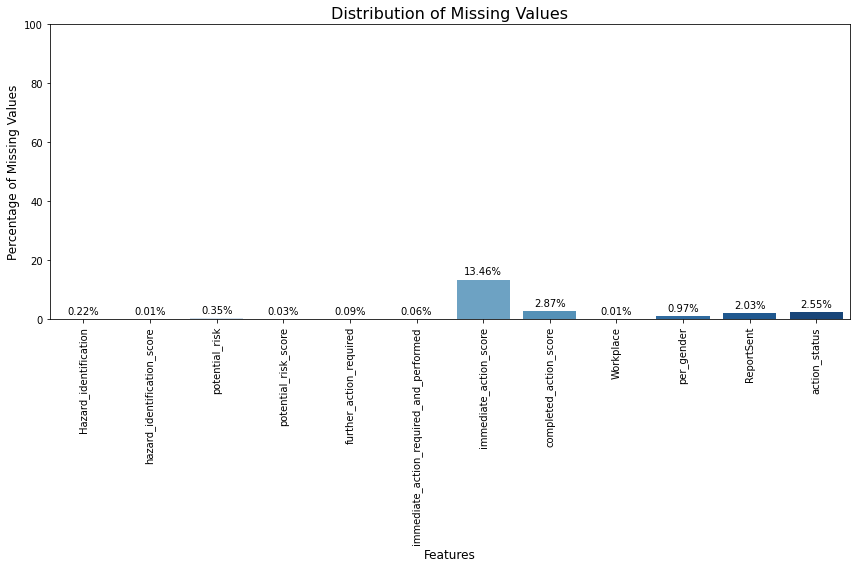

In [186]:
### -----> Dealing with Duplicates <------ ###


def missing_data(df):
    print("Check duplicates:\n", df.duplicated().sum(), "\n")
    print("Check missing values:\n", df.isna().sum(), "\n")
    
    # Analyzing missing data
    missing_data = df.isnull().sum().reset_index()
    missing_data.columns = ['Feature', 'Missing Values']
    missing_data = missing_data[missing_data['Missing Values'] > 0].reset_index(drop=True)
    missing_data['Percentage of Missing Values'] = round((missing_data['Missing Values'] / len(df)) * 100, 2)
    print("Missing data:\n", missing_data, "\n")
    
    # Plot missing data
    fig, ax = plt.subplots(figsize=(12, 8))
    colors = sns.color_palette("Blues", len(missing_data))
    sns.barplot(x='Feature', y='Percentage of Missing Values', data=missing_data, ax=ax, palette=colors)
    ax.set_ylim(0, 100)
    ax.set_title('Distribution of Missing Values', fontsize=16)
    ax.set_xlabel('Features', fontsize=12)
    ax.set_ylabel('Percentage of Missing Values', fontsize=12)
    
    # Add percentage labels to the bars
    for i, bar in enumerate(ax.patches):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1,
                f"{missing_data['Percentage of Missing Values'].values[i]}%",
                ha='center', va='bottom', fontsize=10)

    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

missing_data(hazardData)

In [187]:
### ---> Dropping the NULL valeus <--- ###

hazardData = hazardData.dropna(subset=['Hazard_identification', 'potential_risk','potential_risk_score','further_action_required',
                                       'completed_action_score','Workplace','per_gender','ReportSent','action_status', 'immediate_action_score'])


In [188]:
### ----> Assigning the values to MALE/FEMALE <---- ###

# Replace values in 'per_gender' column
hazardData['per_gender'] = hazardData['per_gender'].replace({6454.0: 'Male', 8610.0: 'Female'})

# Verify the updated DataFrame
print(hazardData['per_gender'].value_counts())

print("Null values : ",hazardData['per_gender'].isnull().sum())

# Drop rows with null values in 'per_gender' column
hazardData.dropna(subset=['per_gender'], inplace=True)

# Drop rows with null values in 'immediate_action_score' column
hazardData.dropna(subset=['immediate_action_score'], inplace=True)

hazardData.shape

#-------------------------------------------------------------#

### ----> Making the 'action_status' in Lower case <---- ###

# Convert 'action_status' values to lowercase
hazardData['action_status'] = hazardData['action_status'].str.lower()

# Verify the updated DataFrame
print(hazardData['action_status'].value_counts())

Male      11251
Female       74
Name: per_gender, dtype: int64
Null values :  0
complete      11295
incomplete       30
Name: action_status, dtype: int64


In [189]:
### ----> Dropping unnessary columns <----- ###

columns_to_drop2 = ['per_gender','action_status']
hazardData.drop(columns=columns_to_drop2, inplace=True)

## Visualization

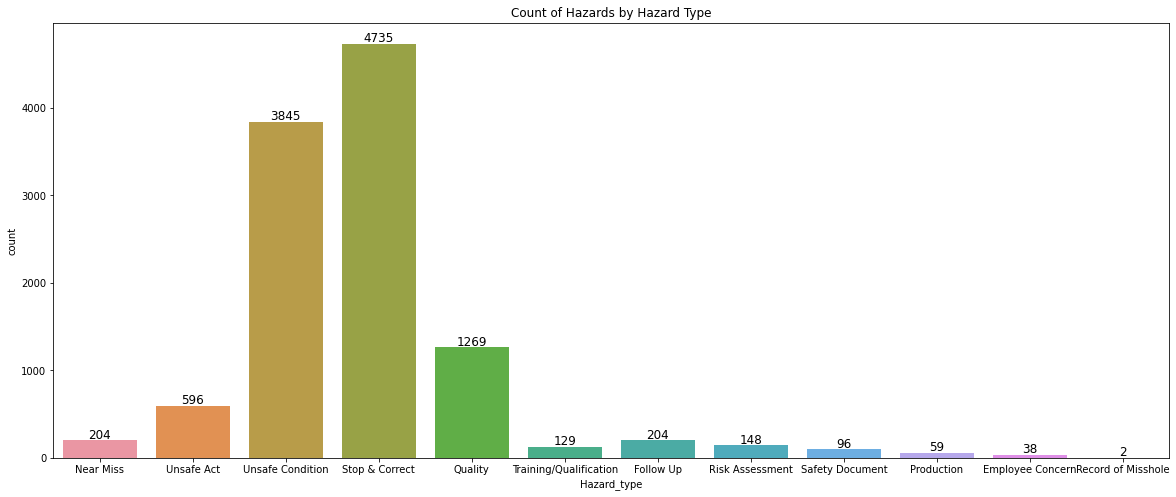

In [190]:
#1 

# Bar chart for count of hazards based on Hazard Type
plt.figure(figsize=(20, 8))
ax = sns.countplot(x='Hazard_type', data=hazardData)

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points', fontsize=12)

plt.title('Count of Hazards by Hazard Type')
plt.show()

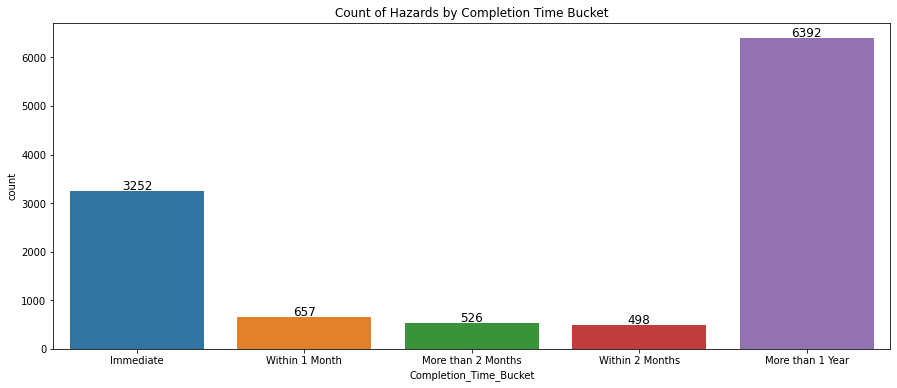

In [191]:
# Bar chart for count of hazards based on Completion_Time_Bucket
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='Completion_Time_Bucket', data=hazardData)

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points', fontsize=12)

plt.title('Count of Hazards by Completion Time Bucket')
plt.show()

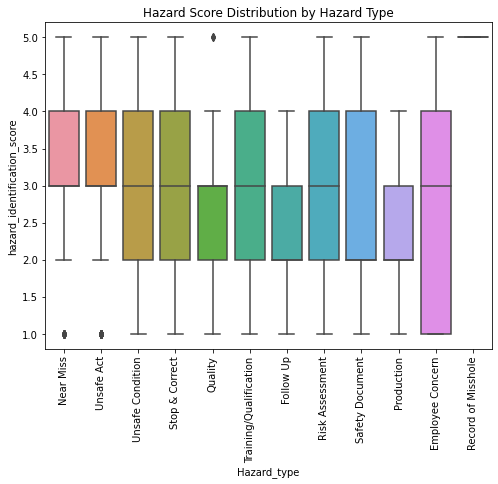

In [194]:
# Box plot for hazard score distribution based on Hazard_type
plt.figure(figsize=(8,6))
sns.boxplot(x='Hazard_type', y='hazard_identification_score', data=hazardData)
plt.title('Hazard Score Distribution by Hazard Type')
plt.xticks(rotation=90)
plt.show()

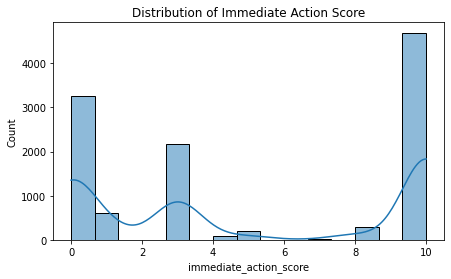

In [195]:
# Histogram for immediate_action_score
plt.figure(figsize=(7,4))
sns.histplot(data=hazardData, x='immediate_action_score', kde=True)
plt.title('Distribution of Immediate Action Score')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


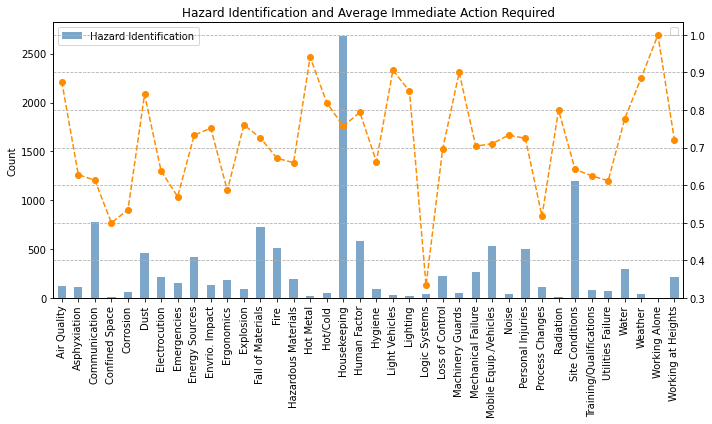

In [192]:

# Prepare the data for the bar chart
bar_data = hazardData['Hazard_identification'].value_counts().sort_index()

# Prepare the data for the line chart
line_data = hazardData.groupby('Hazard_identification')['immediate_action_required_and_performed'].mean().sort_index()

# Create the combination graph
fig, ax1 = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed

# Bar chart
bar_data.plot(kind='bar', color='steelblue', alpha=0.7, label='Hazard Identification', ax=ax1)
ax1.set_ylabel('Count')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# Line chart
ax2 = ax1.twinx()
line_data.plot(secondary_y=True, color='darkorange', linestyle='--', marker='o', label='Avg. Immediate Action Required', ax=ax2)
ax2.set_ylabel('Average Immediate Action Required')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

# Customize the graph
plt.title('Hazard Identification and Average Immediate Action Required')
plt.xlabel('Hazard Identification')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


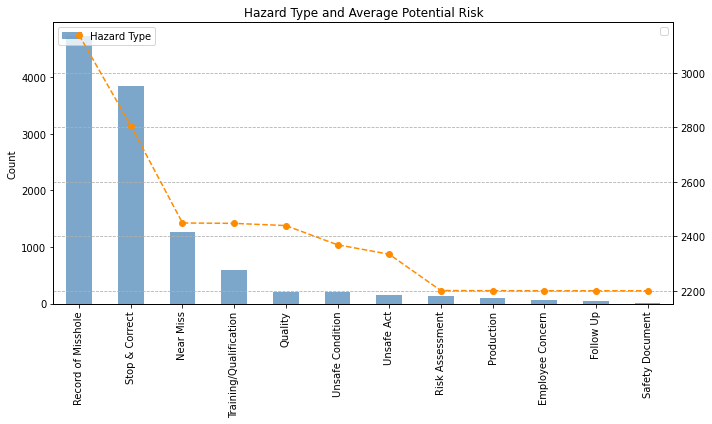

In [193]:
#5

# Prepare the data for the bar chart
bar_data = hazardData['Hazard_type'].value_counts().sort_values(ascending=False)

# Prepare the data for the line chart
line_data = hazardData.groupby('Hazard_type')['potential_risk'].mean().sort_values(ascending=False)

# Create the combination graph
fig, ax1 = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed

# Bar chart
bar_data.plot(kind='bar', color='steelblue', alpha=0.7, label='Hazard Type', ax=ax1)
ax1.set_ylabel('Count')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# Line chart
ax2 = ax1.twinx()
line_data.plot(secondary_y=True, color='darkorange', linestyle='--', marker='o', label='Average Potential Risk', ax=ax2)
ax2.set_ylabel('Average Potential Risk')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

# Customize the graph
plt.title('Hazard Type and Average Potential Risk')
plt.xlabel('Hazard Type')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

plt.show()

## Preparing for Machine Learning Model

In [196]:
### -----> 'Hazard_Type' <------- ###

cols = ['Hazard_type', 'Hazard_identification', 'Completion_Time_Bucket', 'immediate_action_taken', 'recommended_action', 'Workplace', 'Supervisor_Name']
print(hazardData[cols].nunique())

Hazard_type                 12
Hazard_identification       38
Completion_Time_Bucket       5
immediate_action_taken    7780
recommended_action        5104
Workplace                 3946
Supervisor_Name            329
dtype: int64


In [197]:
### -----> All categorical variables ready for Lable Encode <---- ###

from sklearn.preprocessing import LabelEncoder

cols2 = ['Hazard_identification', 'immediate_action_taken', 'recommended_action', 'Workplace', 'Completion_Time_Bucket','Hazard_type', 'Supervisor_Name']
encoder = LabelEncoder()
for col in cols2:
    hazardData[col] = encoder.fit_transform(hazardData[col])

# Print the updated DataFrame
print(hazardData)

       Hazard_type  Hazard_identification  hazard_identification_score  \
1                2                     34                          4.0   
3               10                      8                          4.0   
5               11                     17                          3.0   
6               11                     10                          2.0   
8               11                     26                          3.0   
...            ...                    ...                          ...   
14425            8                      1                          5.0   
14427            2                      0                          4.0   
14428            2                      0                          4.0   
14438            5                      1                          5.0   
14474            2                      0                          4.0   

       Completion_Time_Bucket  potential_risk  potential_risk_score  \
1                           0          2

In [198]:
### ----> Dropping unnessary columns <----- ###

columns_to_drop2 = ['per_first_name','per_last_name']
hazardData.drop(columns=columns_to_drop2, inplace=True)

In [199]:
hazardData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11325 entries, 1 to 14474
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Hazard_type                              11325 non-null  int64  
 1   Hazard_identification                    11325 non-null  int64  
 2   hazard_identification_score              11325 non-null  float64
 3   Completion_Time_Bucket                   11325 non-null  int64  
 4   potential_risk                           11325 non-null  float64
 5   potential_risk_score                     11325 non-null  float64
 6   further_action_required                  11325 non-null  float64
 7   immediate_action_required_and_performed  11325 non-null  float64
 8   immediate_action_taken                   11325 non-null  int64  
 9   recommended_action                       11325 non-null  int64  
 10  immediate_action_score                   11325

In [200]:
### -----> This pure data without having nay null values <---- ###

hazardData.isnull().sum()

Hazard_type                                0
Hazard_identification                      0
hazard_identification_score                0
Completion_Time_Bucket                     0
potential_risk                             0
potential_risk_score                       0
further_action_required                    0
immediate_action_required_and_performed    0
immediate_action_taken                     0
recommended_action                         0
immediate_action_score                     0
completed_action_score                     0
Site                                       0
SiteLevel                                  0
Workplace                                  0
ReportSent                                 0
Supervisor_Name                            0
sha_enable                                 0
dtype: int64

In [201]:
### ----> Prepration for Traget Variable : Completion_Time_Bucket <----- ###

hazardData['Completion_Time_Bucket'].unique()
hazardData['Completion_Time_Bucket'].value_counts()

1    6392
0    3252
3     657
2     526
4     498
Name: Completion_Time_Bucket, dtype: int64

## ML Model : XG-Boost (1)

In [202]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import stats
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report

In [203]:
hazardData.drop(columns='Supervisor_Name', inplace=True)

In [204]:
#### ---------> Training and Testing split <----------- ###

x = hazardData.drop(['Completion_Time_Bucket'],axis=1)
y = hazardData['Completion_Time_Bucket']

feature_names = x.columns.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [205]:
### -----> Applying SMOTE <----- ###

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


print("Before Upsampling, counts of label '0': {}".format(sum(y_train==0))) 
print ("Before Upsampling, counts of label '01': {} \n".format(sum(y_train==1)))
print("Before Upsampling, counts of label '2': {}".format(sum(y_train==2))) 
print ("Before Upsampling, counts of label '3': {} \n".format(sum(y_train==3)))
print("Before Upsampling, counts of label '4': {}".format(sum(y_train==4))) 
#print ("Before Upsampling, counts of label '5': {} \n".format(sum(y_train==5)))
#print ("Before Upsampling, counts of label '6': {} \n".format(sum(y_train==6)))

# Perform oversampling on minority classes
ros = RandomOverSampler(sampling_strategy='not majority', random_state=42)
x_train_oversampled, y_train_oversampled = ros.fit_resample(x_train, y_train)

# Perform undersampling on majority class
rus = RandomUnderSampler(sampling_strategy='majority', random_state=42)
x_train_balanced, y_train_balanced = rus.fit_resample(x_train_oversampled, y_train_oversampled)

print("After Upsampling, counts of label '0': {}".format(sum(y_train_balanced==0))) 
print ("After Upsampling, counts of label '1': {} \n".format(sum(y_train_balanced==1)))
print("After Upsampling, counts of label '2': {}".format(sum(y_train_balanced==2))) 
print ("After Upsampling, counts of label '3': {} \n".format(sum(y_train_balanced==3)))
print("After Upsampling, counts of label '4': {}".format(sum(y_train_balanced==4))) 
#print ("Before Upsampling, counts of label '5': {} \n".format(sum(y_train_balanced==5)))
#print ("Before Upsampling, counts of label '6': {} \n".format(sum(y_train_balanced==6)))

Before Upsampling, counts of label '0': 2264
Before Upsampling, counts of label '01': 4498 

Before Upsampling, counts of label '2': 359
Before Upsampling, counts of label '3': 468 

Before Upsampling, counts of label '4': 338
After Upsampling, counts of label '0': 4498
After Upsampling, counts of label '1': 4498 

After Upsampling, counts of label '2': 4498
After Upsampling, counts of label '3': 4498 

After Upsampling, counts of label '4': 4498


In [206]:
### ---------> RFE with Cross Validation <--------- #### 

from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import time
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

model1 = XGBClassifier()

# create RFE selector with cross-validation and fit it to the data
rfecv = RFECV(estimator = model1, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(x_train, y_train)   ## x_trin_balanced / y_train_balanced 

# print the optimal number of features
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 7


In [207]:
### -------> Feature selection with RFE <-------- ###
rfe = RFE(model1, n_features_to_select=7)        
X_train_rfe = rfe.fit_transform(x_train, y_train)
X_test_rfe = rfe.transform(x_test) 
selected_features = [feature_names[i] for i in range(len(feature_names)) if rfe.support_[i]]
selected_features_df = pd.DataFrame(selected_features, columns=['Selected Features'])

print(f"{type(model1).__name__}")
print("Selected Features from this model : \n", selected_features_df)

XGBClassifier
Selected Features from this model : 
                          Selected Features
0                           potential_risk
1                  further_action_required
2  immediate_action_required_and_performed
3                   completed_action_score
4                                     Site
5                                SiteLevel
6                                Workplace


In [208]:
start_time = time.time() 

model = XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=500)

# Training the model
model.fit(X_train_rfe, y_train)

# Testing the model
y_pred = model.predict(X_test_rfe)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f} seconds")

print(f"{type(model).__name__}: Selected features = {X_train_rfe.shape[1]}, Accuracy = {acc:.2f}, Precision = {prec}") 
print("Classification Report : \n", classification_report(y_test, y_pred))  

Execution time: 19.66 seconds
XGBClassifier: Selected features = 7, Accuracy = 0.82, Precision = 0.8003708523379539
Classification Report : 
               precision    recall  f1-score   support

           0       0.70      0.85      0.77       988
           1       0.98      0.98      0.98      1894
           2       0.38      0.24      0.30       167
           3       0.29      0.20      0.24       189
           4       0.30      0.17      0.22       160

    accuracy                           0.82      3398
   macro avg       0.53      0.49      0.50      3398
weighted avg       0.80      0.82      0.81      3398



## ML Model : XG-Boost (2) - with balanced data

In [209]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import stats
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report

In [210]:
#### ---------> Training and Testing split <----------- ###

x = hazardData.drop(['Completion_Time_Bucket'],axis=1)
y = hazardData['Completion_Time_Bucket']

feature_names = x.columns.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [211]:
### -----> Applying SMOTE <----- ###

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


print("Before Upsampling, counts of label '0': {}".format(sum(y_train==0))) 
print ("Before Upsampling, counts of label '01': {} \n".format(sum(y_train==1)))
print("Before Upsampling, counts of label '2': {}".format(sum(y_train==2))) 
print ("Before Upsampling, counts of label '3': {} \n".format(sum(y_train==3)))
print("Before Upsampling, counts of label '4': {}".format(sum(y_train==4))) 
#print ("Before Upsampling, counts of label '5': {} \n".format(sum(y_train==5)))
#print ("Before Upsampling, counts of label '6': {} \n".format(sum(y_train==6)))

# Perform oversampling on minority classes
ros = RandomOverSampler(sampling_strategy='not majority', random_state=42)
x_train_oversampled, y_train_oversampled = ros.fit_resample(x_train, y_train)

# Perform undersampling on majority class
rus = RandomUnderSampler(sampling_strategy='majority', random_state=42)
x_train_balanced, y_train_balanced = rus.fit_resample(x_train_oversampled, y_train_oversampled)

print("After Upsampling, counts of label '0': {}".format(sum(y_train_balanced==0))) 
print ("After Upsampling, counts of label '1': {} \n".format(sum(y_train_balanced==1)))
print("After Upsampling, counts of label '2': {}".format(sum(y_train_balanced==2))) 
print ("After Upsampling, counts of label '3': {} \n".format(sum(y_train_balanced==3)))
print("After Upsampling, counts of label '4': {}".format(sum(y_train_balanced==4))) 
#print ("Before Upsampling, counts of label '5': {} \n".format(sum(y_train_balanced==5)))
#print ("Before Upsampling, counts of label '6': {} \n".format(sum(y_train_balanced==6)))

Before Upsampling, counts of label '0': 2264
Before Upsampling, counts of label '01': 4498 

Before Upsampling, counts of label '2': 359
Before Upsampling, counts of label '3': 468 

Before Upsampling, counts of label '4': 338
After Upsampling, counts of label '0': 4498
After Upsampling, counts of label '1': 4498 

After Upsampling, counts of label '2': 4498
After Upsampling, counts of label '3': 4498 

After Upsampling, counts of label '4': 4498


In [212]:
### ---------> RFE with Cross Validation <--------- #### 

from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import time
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

model1 = XGBClassifier()

# create RFE selector with cross-validation and fit it to the data
rfecv = RFECV(estimator = model1, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(x_train_balanced, y_train_balanced)   ## x_trin_balanced / y_train_balanced 

# print the optimal number of features
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 13


In [132]:
### -------> Feature selection with RFE <-------- ###

rfe = RFE(model1, n_features_to_select=13)        
X_train_rfe = rfe.fit_transform(x_train_balanced, y_train_balanced)
X_test_rfe = rfe.transform(x_test) 
selected_features = [feature_names[i] for i in range(len(feature_names)) if rfe.support_[i]]
selected_features_df = pd.DataFrame(selected_features, columns=['Selected Features'])

print(f"{type(model1).__name__}")
print("Selected Features from this model : \n", selected_features_df)

XGBClassifier
Selected Features from this model : 
                           Selected Features
0                               Hazard_type
1                     Hazard_identification
2               hazard_identification_score
3                            potential_risk
4                   further_action_required
5   immediate_action_required_and_performed
6                    immediate_action_taken
7                        recommended_action
8                    immediate_action_score
9                    completed_action_score
10                                     Site
11                                SiteLevel
12                                Workplace


In [133]:
start_time = time.time() 

model = XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=500)

# Training the model
model.fit(X_train_rfe, y_train_balanced)

# Testing the model
y_pred2 = model.predict(X_test_rfe)
acc = accuracy_score(y_test, y_pred2)
prec = precision_score(y_test, y_pred2, average='weighted')

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f} seconds")

print(f"{type(model).__name__}: Selected features = {X_train_rfe.shape[1]}, Accuracy = {acc:.2f}, Precision = {prec}") 
print("Classification Report : \n", classification_report(y_test, y_pred2))  

Execution time: 47.39 seconds
XGBClassifier: Selected features = 13, Accuracy = 0.81, Precision = 0.7881629952884553
Classification Report : 
               precision    recall  f1-score   support

           0       0.69      0.82      0.75       988
           1       0.99      0.97      0.98      1894
           2       0.32      0.22      0.26       167
           3       0.21      0.17      0.19       189
           4       0.22      0.13      0.16       160

    accuracy                           0.81      3398
   macro avg       0.49      0.46      0.47      3398
weighted avg       0.79      0.81      0.79      3398



## ML Model : Rabdom Forest (1)

In [213]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import stats
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report

In [214]:
#### ---------> Training and Testing split <----------- ###

x = hazardData.drop(['Completion_Time_Bucket'],axis=1)
y = hazardData['Completion_Time_Bucket']

feature_names = x.columns.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [215]:
### -----> Applying SMOTE <----- ###

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


print("Before Upsampling, counts of label '0': {}".format(sum(y_train==0))) 
print ("Before Upsampling, counts of label '01': {} \n".format(sum(y_train==1)))
print("Before Upsampling, counts of label '2': {}".format(sum(y_train==2))) 
print ("Before Upsampling, counts of label '3': {} \n".format(sum(y_train==3)))
print("Before Upsampling, counts of label '4': {}".format(sum(y_train==4))) 
#print ("Before Upsampling, counts of label '5': {} \n".format(sum(y_train==5)))
#print ("Before Upsampling, counts of label '6': {} \n".format(sum(y_train==6)))

# Perform oversampling on minority classes
ros = RandomOverSampler(sampling_strategy='not majority', random_state=42)
x_train_oversampled, y_train_oversampled = ros.fit_resample(x_train, y_train)

# Perform undersampling on majority class
rus = RandomUnderSampler(sampling_strategy='majority', random_state=42)
x_train_balanced, y_train_balanced = rus.fit_resample(x_train_oversampled, y_train_oversampled)

print("After Upsampling, counts of label '0': {}".format(sum(y_train_balanced==0))) 
print ("After Upsampling, counts of label '1': {} \n".format(sum(y_train_balanced==1)))
print("After Upsampling, counts of label '2': {}".format(sum(y_train_balanced==2))) 
print ("After Upsampling, counts of label '3': {} \n".format(sum(y_train_balanced==3)))
print("After Upsampling, counts of label '4': {}".format(sum(y_train_balanced==4))) 

Before Upsampling, counts of label '0': 2264
Before Upsampling, counts of label '01': 4498 

Before Upsampling, counts of label '2': 359
Before Upsampling, counts of label '3': 468 

Before Upsampling, counts of label '4': 338
After Upsampling, counts of label '0': 4498
After Upsampling, counts of label '1': 4498 

After Upsampling, counts of label '2': 4498
After Upsampling, counts of label '3': 4498 

After Upsampling, counts of label '4': 4498


In [216]:
### ---------> RFE with Cross Validation <--------- #### 

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import time
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

model1 = RandomForestClassifier()

# create RFE selector with cross-validation and fit it to the data
rfecv = RFECV(estimator = model1, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(x_train, y_train)   ## x_trin_balanced / y_train_balanced 

# print the optimal number of features
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 9


In [218]:
### -------> Feature selection with RFE <-------- ###
rfe = RFE(model1, n_features_to_select=9)        
X_train_rfe = rfe.fit_transform(x_train, y_train)
X_test_rfe = rfe.transform(x_test) 
selected_features = [feature_names[i] for i in range(len(feature_names)) if rfe.support_[i]]
selected_features_df = pd.DataFrame(selected_features, columns=['Selected Features'])

print(f"{type(model1).__name__}")
print("Selected Features from this model : \n", selected_features_df)

RandomForestClassifier
Selected Features from this model : 
                          Selected Features
0                    Hazard_identification
1                           potential_risk
2                  further_action_required
3  immediate_action_required_and_performed
4                       recommended_action
5                   immediate_action_score
6                   completed_action_score
7                                SiteLevel
8                                Workplace


In [219]:
start_time = time.time() 

model = RandomForestClassifier(max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=1000)

# Training the model
model.fit(X_train_rfe, y_train)

# Testing the model
y_pred = model.predict(X_test_rfe)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f} seconds")

print(f"{type(model).__name__}: Selected features = {X_train_rfe.shape[1]}, Accuracy = {acc:.2f}, Precision = {prec}") 
print("Classification Report : \n", classification_report(y_test, y_pred))  

Execution time: 11.94 seconds
RandomForestClassifier: Selected features = 9, Accuracy = 0.82, Precision = 0.7907270348939855
Classification Report : 
               precision    recall  f1-score   support

           0       0.66      0.93      0.77       988
           1       0.99      0.97      0.98      1894
           2       0.31      0.08      0.13       167
           3       0.24      0.07      0.11       189
           4       0.39      0.09      0.15       160

    accuracy                           0.82      3398
   macro avg       0.52      0.43      0.43      3398
weighted avg       0.79      0.82      0.79      3398



## ML Model : Random Forest - (2) - with balanced data

In [220]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import stats
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report

In [221]:
#### ---------> Training and Testing split <----------- ###

x = hazardData.drop(['Completion_Time_Bucket'],axis=1)
y = hazardData['Completion_Time_Bucket']

feature_names = x.columns.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [222]:
### -----> Applying SMOTE <----- ###

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


print("Before Upsampling, counts of label '0': {}".format(sum(y_train==0))) 
print ("Before Upsampling, counts of label '01': {} \n".format(sum(y_train==1)))
print("Before Upsampling, counts of label '2': {}".format(sum(y_train==2))) 
print ("Before Upsampling, counts of label '3': {} \n".format(sum(y_train==3)))
print("Before Upsampling, counts of label '4': {}".format(sum(y_train==4))) 

# Perform oversampling on minority classes
ros = RandomOverSampler(sampling_strategy='not majority', random_state=42)
x_train_oversampled, y_train_oversampled = ros.fit_resample(x_train, y_train)

# Perform undersampling on majority class
rus = RandomUnderSampler(sampling_strategy='majority', random_state=42)
x_train_balanced, y_train_balanced = rus.fit_resample(x_train_oversampled, y_train_oversampled)

print("After Upsampling, counts of label '0': {}".format(sum(y_train_balanced==0))) 
print ("After Upsampling, counts of label '1': {} \n".format(sum(y_train_balanced==1)))
print("After Upsampling, counts of label '2': {}".format(sum(y_train_balanced==2))) 
print ("After Upsampling, counts of label '3': {} \n".format(sum(y_train_balanced==3)))
print("After Upsampling, counts of label '4': {}".format(sum(y_train_balanced==4))) 

Before Upsampling, counts of label '0': 2264
Before Upsampling, counts of label '01': 4498 

Before Upsampling, counts of label '2': 359
Before Upsampling, counts of label '3': 468 

Before Upsampling, counts of label '4': 338
After Upsampling, counts of label '0': 4498
After Upsampling, counts of label '1': 4498 

After Upsampling, counts of label '2': 4498
After Upsampling, counts of label '3': 4498 

After Upsampling, counts of label '4': 4498


In [223]:
### ---------> RFE with Cross Validation <--------- #### 

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import time
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

model1 = RandomForestClassifier()

# create RFE selector with cross-validation and fit it to the data
rfecv = RFECV(estimator = model1, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(x_train_balanced, y_train_balanced)   ## x_trin_balanced / y_train_balanced 

# print the optimal number of features
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 8


In [224]:
### -------> Feature selection with RFE <-------- ###
rfe = RFE(model1, n_features_to_select= 8)        
X_train_rfe = rfe.fit_transform(x_train_balanced, y_train_balanced)
X_test_rfe = rfe.transform(x_test) 
selected_features = [feature_names[i] for i in range(len(feature_names)) if rfe.support_[i]]
selected_features_df = pd.DataFrame(selected_features, columns=['Selected Features'])

print(f"{type(model1).__name__}")
print("Selected Features from this model : \n", selected_features_df)

RandomForestClassifier
Selected Features from this model : 
          Selected Features
0    Hazard_identification
1           potential_risk
2  further_action_required
3   immediate_action_taken
4       recommended_action
5   completed_action_score
6                SiteLevel
7                Workplace


In [225]:
start_time = time.time() 

model = RandomForestClassifier(max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=1000)

# Training the model
model.fit(X_train_rfe, y_train_balanced)

# Testing the model
y_pred = model.predict(X_test_rfe)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f} seconds")

print(f"{type(model).__name__}: Selected features = {X_train_rfe.shape[1]}, Accuracy = {acc:.2f}, Precision = {prec}") 
print("Classification Report : \n", classification_report(y_test, y_pred))  

Execution time: 24.31 seconds
RandomForestClassifier: Selected features = 8, Accuracy = 0.82, Precision = 0.7862357054611656
Classification Report : 
               precision    recall  f1-score   support

           0       0.66      0.91      0.76       988
           1       1.00      0.97      0.98      1894
           2       0.28      0.10      0.15       167
           3       0.20      0.08      0.12       189
           4       0.30      0.12      0.17       160

    accuracy                           0.82      3398
   macro avg       0.49      0.44      0.44      3398
weighted avg       0.79      0.82      0.79      3398

